# Dungeons & Dragons Meta Analysis

This notebook explores Dungeons & Dragons (D&D) player and session data using a relational SQLite database.

## Goals

- Analyze which **classes** and **races** are most popular across all sessions.
- Explore **race–class combinations** to see what players actually choose at the table.
- Measure **player activity** across sessions and campaigns.
- Summarize **campaign engagement** (how many players and sessions each campaign gets).

The data comes from:

- A **catalog** of D&D classes and races.
- A **session log** transformed into a normalized SQLite database (`dnd_meta.db`) with tables for:
  - `Races`, `Classes`, `Players`, `Campaigns`, `Sessions`, and `SessionPlayers`.


In [1]:
import sqlite3
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

# Display settings
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 20)

# Path to the SQLite database
DB_PATH = Path("dnd_meta.db")

if not DB_PATH.exists():
    raise FileNotFoundError(f"Database not found at {DB_PATH.resolve()}")

def run_query(sql: str, params=None) -> pd.DataFrame:
    """Helper to run a SQL query and return a pandas DataFrame."""
    if params is None:
        params = ()
    with sqlite3.connect(DB_PATH) as conn:
        return pd.read_sql_query(sql, conn, params=params)


In [2]:
tables = run_query("""
SELECT name
FROM sqlite_master
WHERE type = 'table'
ORDER BY name;
""")
tables

,name
0,Campaigns
1,CatalogRaw
2,Classes
3,Players
4,Races
5,SessionPlayers
6,Sessions
7,SessionsRaw


In [3]:
df_races = run_query("SELECT * FROM Races;")
df_classes = run_query("SELECT * FROM Classes;")
df_players = run_query("SELECT * FROM Players;")
df_campaigns = run_query("SELECT * FROM Campaigns;")
df_sessions = run_query("SELECT * FROM Sessions;")
df_session_players = run_query("SELECT * FROM SessionPlayers;")

df_races.head(), df_classes.head(), df_sessions.head()


(   RaceID  RaceName
 0       1     Human
 1       2       Elf
 2       3     Dwarf
 3       4  Halfling
 4       5  Tiefling,
    ClassID ClassName  Tier Popularity
 0        1   Fighter   Mid       High
 1        2    Wizard  High       High
 2        3     Rogue   Mid     Medium
 3        4    Cleric  High     Medium
 4        5   Warlock   Mid        Low,
    SessionID  CampaignID SessionDate                                 Notes
 0          1           1  2025-01-05            Session 1: Village on fire
 1          2           1  2025-01-12       Session 2: Into the Ember Mines
 2          3           1  2025-01-19           Session 3: First boss fight
 3          4           2  2025-02-02  Session 1: Mysterious disappearances
 4          5           2  2025-02-09            Session 2: Cultist hideout)

In [4]:
print("=== Races ===")
display(df_races.head())
print(df_races.info(), "\n")

print("=== Classes ===")
display(df_classes.head())
print(df_classes.info(), "\n")

print("=== Players ===")
display(df_players.head())
print(df_players.info(), "\n")

print("=== Campaigns ===")
display(df_campaigns.head())
print(df_campaigns.info(), "\n")

print("=== Sessions ===")
display(df_sessions.head())
print(df_sessions.info(), "\n")

print("=== SessionPlayers ===")
display(df_session_players.head())
print(df_session_players.info())

=== Races ===


,RaceID,RaceName
0,1,Human
1,2,Elf
2,3,Dwarf
3,4,Halfling
4,5,Tiefling


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RaceID    5 non-null      int64 
 1   RaceName  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes
None 

=== Classes ===


,ClassID,ClassName,Tier,Popularity
0,1,Fighter,Mid,High
1,2,Wizard,High,High
2,3,Rogue,Mid,Medium
3,4,Cleric,High,Medium
4,5,Warlock,Mid,Low


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ClassID     5 non-null      int64 
 1   ClassName   5 non-null      object
 2   Tier        5 non-null      object
 3   Popularity  5 non-null      object
dtypes: int64(1), object(3)
memory usage: 292.0+ bytes
None 

=== Players ===


,PlayerID,PlayerName
0,1,Asha
1,2,Bryn
2,3,Corin
3,4,Dax
4,5,Elira


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PlayerID    6 non-null      int64 
 1   PlayerName  6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes
None 

=== Campaigns ===


,CampaignID,Title,Setting
0,1,Curse of the Ember King,Forgotten Realms
1,2,Shadows Over Blackreach,Homebrew Dark Fantasy
2,3,Storms of the Sapphire Sea,Seafaring / Ocean


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CampaignID  3 non-null      int64 
 1   Title       3 non-null      object
 2   Setting     3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes
None 

=== Sessions ===


,SessionID,CampaignID,SessionDate,Notes
0,1,1,2025-01-05,Session 1: Village on fire
1,2,1,2025-01-12,Session 2: Into the Ember Mines
2,3,1,2025-01-19,Session 3: First boss fight
3,4,2,2025-02-02,Session 1: Mysterious disappearances
4,5,2,2025-02-09,Session 2: Cultist hideout


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SessionID    6 non-null      int64 
 1   CampaignID   6 non-null      int64 
 2   SessionDate  6 non-null      object
 3   Notes        6 non-null      object
dtypes: int64(2), object(2)
memory usage: 324.0+ bytes
None 

=== SessionPlayers ===


,SessionID,PlayerID,RaceID,ClassID,Subclass
0,1,1,2,2,Evocation
1,1,2,1,1,Champion
2,1,3,4,3,Thief
3,2,1,2,2,Evocation
4,2,2,1,1,Champion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SessionID  19 non-null     int64 
 1   PlayerID   19 non-null     int64 
 2   RaceID     19 non-null     int64 
 3   ClassID    19 non-null     int64 
 4   Subclass   19 non-null     object
dtypes: int64(4), object(1)
memory usage: 892.0+ bytes
None


In [5]:
# Make copies so we don't accidentally mutate raw pulls
races = df_races.copy()
classes = df_classes.copy()
players = df_players.copy()
campaigns = df_campaigns.copy()
sessions = df_sessions.copy()
session_players = df_session_players.copy()

# Normalize key text fields to title case and strip whitespace
for col in ("RaceName",):
    if col in races.columns:
        races[col] = races[col].astype(str).str.strip().str.title()

for col in ("ClassName", "Tier", "Popularity"):
    if col in classes.columns:
        classes[col] = classes[col].astype(str).str.strip().str.title()

if "PlayerName" in players.columns:
    players["PlayerName"] = players["PlayerName"].astype(str).str.strip()

if "Title" in campaigns.columns:
    campaigns["Title"] = campaigns["Title"].astype(str).str.strip()

# Convert SessionDate to datetime if present
date_col = None
for candidate in ("SessionDate", "Date"):
    if candidate in sessions.columns:
        date_col = candidate
        break

if date_col:
    sessions[date_col] = pd.to_datetime(sessions[date_col], errors="coerce")

sessions.head()

,SessionID,CampaignID,SessionDate,Notes
0,1,1,2025-01-05,Session 1: Village on fire
1,2,1,2025-01-12,Session 2: Into the Ember Mines
2,3,1,2025-01-19,Session 3: First boss fight
3,4,2,2025-02-02,Session 1: Mysterious disappearances
4,5,2,2025-02-09,Session 2: Cultist hideout


In [6]:
# Detect date column again
date_col = date_col or "SessionDate"  # fallback

fact = (
    session_players
    .merge(sessions, on="SessionID", how="left", suffixes=("", "_sess"))
    .merge(players,  on="PlayerID", how="left")
    .merge(campaigns, on="CampaignID", how="left", suffixes=("", "_camp"))
    .merge(races,  on="RaceID", how="left")
    .merge(classes, on="ClassID", how="left", suffixes=("", "_class"))
)

fact.head()

,SessionID,PlayerID,RaceID,ClassID,Subclass,CampaignID,SessionDate,Notes,PlayerName,Title,Setting,RaceName,ClassName,Tier,Popularity
0,1,1,2,2,Evocation,1,2025-01-05,Session 1: Village on fire,Asha,Curse of the Ember King,Forgotten Realms,Elf,Wizard,High,High
1,1,2,1,1,Champion,1,2025-01-05,Session 1: Village on fire,Bryn,Curse of the Ember King,Forgotten Realms,Human,Fighter,Mid,High
2,1,3,4,3,Thief,1,2025-01-05,Session 1: Village on fire,Corin,Curse of the Ember King,Forgotten Realms,Halfling,Rogue,Mid,Medium
3,2,1,2,2,Evocation,1,2025-01-12,Session 2: Into the Ember Mines,Asha,Curse of the Ember King,Forgotten Realms,Elf,Wizard,High,High
4,2,2,1,1,Champion,1,2025-01-12,Session 2: Into the Ember Mines,Bryn,Curse of the Ember King,Forgotten Realms,Human,Fighter,Mid,High


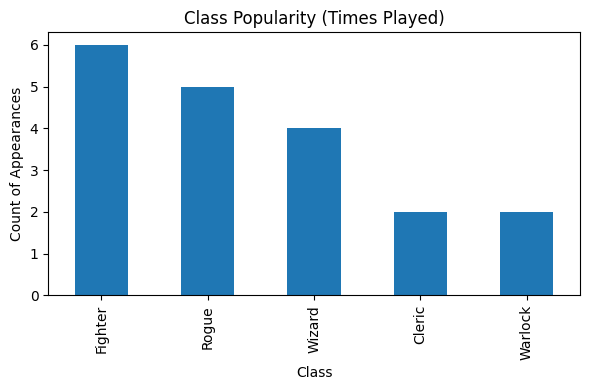

ClassName
Fighter    6
Rogue      5
Wizard     4
Cleric     2
Warlock    2
Name: count, dtype: int64

In [7]:
class_counts = fact["ClassName"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
class_counts.plot(kind="bar")
plt.title("Class Popularity (Times Played)")
plt.xlabel("Class")
plt.ylabel("Count of Appearances")
plt.tight_layout()
plt.show()

class_counts

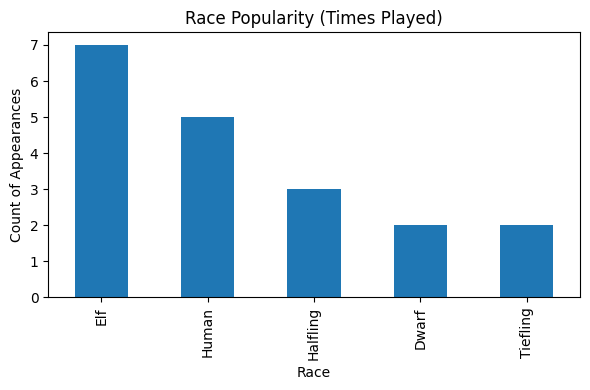

RaceName
Elf         7
Human       5
Halfling    3
Dwarf       2
Tiefling    2
Name: count, dtype: int64

In [8]:
race_counts = fact["RaceName"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
race_counts.plot(kind="bar")
plt.title("Race Popularity (Times Played)")
plt.xlabel("Race")
plt.ylabel("Count of Appearances")
plt.tight_layout()
plt.show()

race_counts

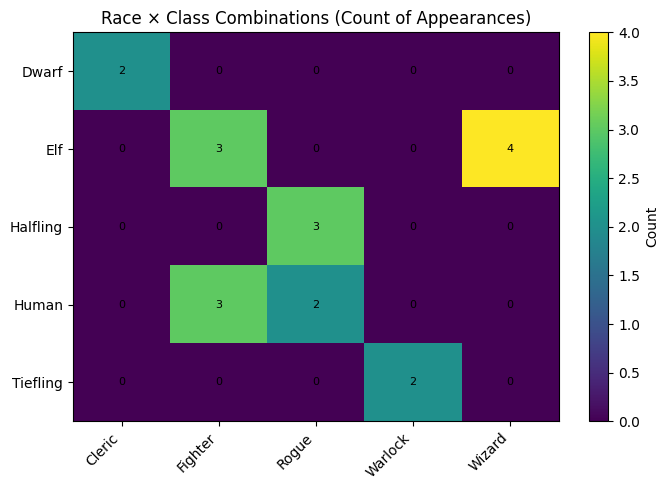

In [9]:
pivot_rc = pd.pivot_table(
    fact,
    index="RaceName",
    columns="ClassName",
    values="SessionID",
    aggfunc="count",
    fill_value=0
)

pivot_rc

plt.figure(figsize=(7, 5))
ax = plt.gca()
im = ax.imshow(pivot_rc.values, aspect="auto")

ax.set_xticks(range(len(pivot_rc.columns)))
ax.set_yticks(range(len(pivot_rc.index)))
ax.set_xticklabels(pivot_rc.columns, rotation=45, ha="right")
ax.set_yticklabels(pivot_rc.index)

# Write counts in cells
for i in range(pivot_rc.shape[0]):
    for j in range(pivot_rc.shape[1]):
        ax.text(j, i, pivot_rc.values[i, j], ha="center", va="center", fontsize=8)

plt.title("Race × Class Combinations (Count of Appearances)")
plt.colorbar(im, label="Count")
plt.tight_layout()
plt.show()

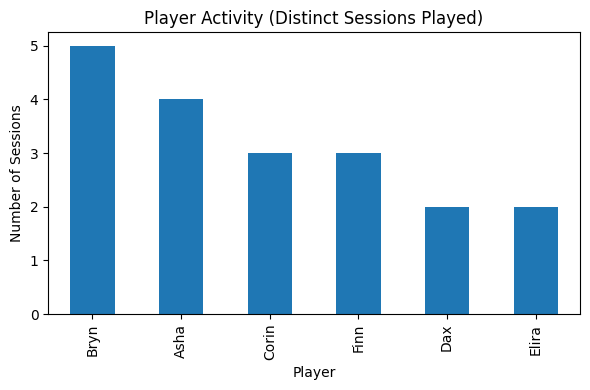

PlayerName
Bryn     5
Asha     4
Corin    3
Finn     3
Dax      2
Elira    2
Name: SessionID, dtype: int64

In [10]:
player_activity = (
    fact.groupby("PlayerName")["SessionID"]
    .nunique()
    .sort_values(ascending=False)
)

plt.figure(figsize=(6, 4))
player_activity.plot(kind="bar")
plt.title("Player Activity (Distinct Sessions Played)")
plt.xlabel("Player")
plt.ylabel("Number of Sessions")
plt.tight_layout()
plt.show()

player_activity

In [11]:
campaign_stats = (
    fact.groupby("Title")
    .agg(
        TotalPlayerAppearances=("SessionID", "count"),
        SessionCount=("SessionID", "nunique"),
        UniquePlayers=("PlayerID", "nunique")
    )
    .sort_values("TotalPlayerAppearances", ascending=False)
)

campaign_stats

,TotalPlayerAppearances,SessionCount,UniquePlayers
Title,,,
Curse of the Ember King,10,3,5
Shadows Over Blackreach,6,2,3
Storms of the Sapphire Sea,3,1,3


In [12]:
q_classes = """
SELECT
    c.ClassName,
    COUNT(*) AS TimesPlayed
FROM SessionPlayers sp
JOIN Classes c ON c.ClassID = sp.ClassID
GROUP BY c.ClassName
ORDER BY TimesPlayed DESC;
"""

run_query(q_classes)

,ClassName,TimesPlayed
0,Fighter,6
1,Rogue,5
2,Wizard,4
3,Warlock,2
4,Cleric,2


## Conclusions

From this analysis, we can see that:

- **Class popularity:**  
  The most commonly played classes are ... (fill in based on `class_counts`).

- **Race popularity:**  
  The most commonly played races are ... (from `race_counts`).

- **Race–class combos:**  
  The heatmap shows that certain race–class combinations (e.g., Elf Wizard, Human Fighter) dominate player choices.

- **Player engagement:**  
  Some players appear in significantly more sessions than others, suggesting they are core members of their campaign groups.

- **Campaign engagement:**  
  Campaigns with more total player appearances and unique players likely represent longer-running or more popular story arcs.

### Limitations

- The dataset is relatively small / sample-based.
- Not all sessions or campaigns may be represented.
- Subclass usage is simplified and may not include level progression.

### Future Work

- Add more detailed logs per session (monsters fought, locations, outcomes).
- Integrate spell or item data to study build trends.
- Compare this table's patterns against public D&D meta data.